<a href="https://colab.research.google.com/github/Maratinhos/hw/blob/master/Kaggle_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
%matplotlib inline

In [6]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
!ls

drive  kaggle.json  sample_data  test.csv  train.csv


In [0]:
!mkdir ~/.kaggle

In [0]:
!mv kaggle.json ~/.kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c digit-recognizer

 68% 50.0M/73.2M [00:01<00:00, 26.0MB/s]
100% 73.2M/73.2M [00:01<00:00, 50.6MB/s]
 82% 40.0M/48.8M [00:01<00:00, 12.4MB/s]
100% 48.8M/48.8M [00:02<00:00, 23.0MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 106MB/s]


In [0]:
train_dataset = np.loadtxt('train.csv', skiprows=1, delimiter=',')

In [0]:
test_dataset = np.loadtxt('test.csv', skiprows = 1, delimiter = ',')

In [15]:
(train_dataset.shape, test_dataset.shape)

((42000, 785), (28000, 784))

In [0]:
x_train = train_dataset[:, 1:]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = test_dataset.reshape(test_dataset.shape[0], 28, 28, 1)

In [0]:
x_train /= 255.0
x_test /= 255.0

In [0]:
y_train = train_dataset[:, 0]

In [0]:
y_train = utils.to_categorical(y_train)

In [20]:
(x_train.shape, y_train.shape)

((42000, 28, 28, 1), (42000, 10))

In [0]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = random_seed)

In [321]:
(X_train.shape, X_val.shape)

((33600, 28, 28, 1), (8400, 28, 28, 1))

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range = 10,
    #zoom_range = 0.1,
    horizontal_flip=False,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

In [0]:
val_datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
#model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 192, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
#model.add(Conv2D(filters = 192, kernel_size = 5, padding = 'same', activation = 'relu'))
#model.add(MaxPooling2D(pool_size = 2, padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#print(model.summary())

In [0]:
checkpoint = ModelCheckpoint('kaggle-digit-rec.hdf5', monitor = 'val_acc', save_best_only = True, verbose = 1, mode = 'max')

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.3, min_lr = 0.00000001)

In [0]:
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

In [0]:
batch_size = 192

In [331]:
history = model.fit(train_datagen.flow(X_train, Y_train, batch_size = batch_size),
                   #X_train, Y_train, batch_size = batch_size,
                   epochs = 30,
                   validation_data = (X_val, Y_val),
                   #validation_data = val_datagen.flow(X_val, Y_val, batch_size = batch_size),
                   steps_per_epoch = X_train.shape[0] // batch_size,
                   verbose = 1,
                   callbacks = [checkpoint, learning_rate_reduction])

Epoch 1/30
173/175 [============================>.] - ETA: 0s - loss: 0.0290 - acc: 0.9915
Epoch 00001: val_acc did not improve from 0.99583
175/175 [==============================] - 7s 38ms/step - loss: 0.0290 - acc: 0.9915 - val_loss: 0.0169 - val_acc: 0.9956
Epoch 2/30
174/175 [============================>.] - ETA: 0s - loss: 0.0280 - acc: 0.9912
Epoch 00002: val_acc did not improve from 0.99583
175/175 [==============================] - 7s 40ms/step - loss: 0.0282 - acc: 0.9912 - val_loss: 0.0170 - val_acc: 0.9955
Epoch 3/30
174/175 [============================>.] - ETA: 0s - loss: 0.0276 - acc: 0.9919
Epoch 00003: val_acc did not improve from 0.99583
175/175 [==============================] - 7s 40ms/step - loss: 0.0277 - acc: 0.9918 - val_loss: 0.0170 - val_acc: 0.9952
Epoch 4/30
173/175 [============================>.] - ETA: 0s - loss: 0.0288 - acc: 0.9904
Epoch 00004: val_acc did not improve from 0.99583

Epoch 00004: ReduceLROnPlateau reducing learning rate to 7.2899999850

KeyboardInterrupt: ignored

In [0]:
model.load_weights('kaggle-digit-rec.hdf5')

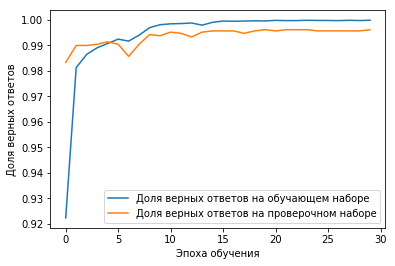

In [312]:
plt.plot(history.history['acc'], label = 'Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], label = 'Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions = np.argmax(predictions, axis = 1)

In [0]:
out = np.column_stack((range(1, predictions.shape[0] + 1), predictions))

In [0]:
np.savetxt('submission.csv', out, header = 'ImageId,Label', comments = '', fmt = '%d,%d')

In [317]:
!kaggle competitions submit -c digit-recognizer -m 'My submission #2' -f submission.csv

100% 208k/208k [00:00<00:00, 666kB/s]
Successfully submitted to Digit Recognizer